In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE

#-------------------------------------------------------------------------------
# Load dataset
url = '/content/Dataset1.csv'
data = pd.read_csv(url)

In [20]:
#-------------------------------------------------------------------------------
# Split dataset into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# View basic information of the data
print(train_data.info())
print(train_data.describe())


#-------------------------------------------------------------------------------
#Explaination ->
#train_test_split: This function from sklearn.model_selection is used to randomly split the dataset into two parts:
#   -Training Set: 80% of the data, used to train the machine learning model.
#   -Testing Set: 20% of the data, used to evaluate the model’s performance on unseen data.

<class 'pandas.core.frame.DataFrame'>
Index: 436 entries, 46 to 102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             436 non-null    int64 
 1   area              436 non-null    int64 
 2   bedrooms          436 non-null    int64 
 3   bathrooms         436 non-null    int64 
 4   stories           436 non-null    int64 
 5   mainroad          436 non-null    object
 6   guestroom         436 non-null    object
 7   basement          436 non-null    object
 8   hotwaterheating   436 non-null    object
 9   airconditioning   436 non-null    object
 10  parking           436 non-null    int64 
 11  prefarea          436 non-null    object
 12  furnishingstatus  436 non-null    object
dtypes: int64(6), object(7)
memory usage: 47.7+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  4.360000e+02    436.000000  436.000000  436.000000  436.000000   
mean   

In [21]:
#-------------------------------------------------------------------------------
# 1. Data Cleaning

# Initial check for missing values and duplicates before cleaning
print("Initial missing values in the dataset:")
print(train_data.isnull().sum())

# Handling missing values: Fill with mean for numerical and mode for categorical
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Separate numerical and categorical columns
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_data.select_dtypes(include=['object','category']).columns # Include 'category' data type

# Apply imputation to handle missing values
train_data[num_cols] = num_imputer.fit_transform(train_data[num_cols])
if len(cat_cols) > 0: # Check if any categorical columns exist before imputation
    train_data[cat_cols] = cat_imputer.fit_transform(train_data[cat_cols])

# After imputation, check again for missing values
print("\nMissing values after imputation:")
print(train_data.isnull().sum())

# Check for duplicates before removal
duplicates_count = train_data.duplicated().sum()
print(f"\nNumber of duplicate rows before removal: {duplicates_count}")

# Remove duplicates if any
train_data = train_data.drop_duplicates()

# Check for duplicates again
duplicates_count_after = train_data.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_count_after}")

# Final confirmation
print("\nData Cleaning completed successfully!")

#-------------------------------------------------------------------------------
#Explaination ->
#   - This code snippet systematically cleans the dataset by handling missing values and duplicates. It employs imputation techniques to fill in missing data,
#   - checks for and removes duplicate rows, and provides feedback at each step to ensure data quality, ultimately enhancing the dataset's suitability for analysis and modeling.
#   - Why Use This Model?:
#        - Data cleaning is a critical step in the data preprocessing pipeline,
#        - As it helps improve the quality of the dataset. Missing values and duplicates can negatively impact model performance, lead to biases, and result in inaccurate predictions.

Initial missing values in the dataset:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing values after imputation:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0

Data Cleaning completed successfully!


In [25]:
#-------------------------------------------------------------------------------
# 2. Feature Scaling

# Check the range of numerical features before scaling
print("\nRange of numerical features before scaling:")
for col in num_cols:
    print(f"{col}: Min={train_data[col].min()}, Max={train_data[col].max()}")

# Apply Min-Max scaling (alternative: use StandardScaler for standardization)
scaler = MinMaxScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])

# Check the range of numerical features after scaling
print("\nRange of numerical features after Min-Max scaling:")
for col in num_cols:
    print(f"{col}: Min={train_data[col].min()}, Max={train_data[col].max()}")

# Final confirmation
print("\nFeature scaling completed successfully!")

#-------------------------------------------------------------------------------
# Why Use This Model?: ->
#   - Feature scaling is important because many machine learning algorithms (like KNN, SVM, and neural networks) are sensitive to the scale of the input data.
#   - If features are on different scales, it can lead to biased results and poor model performance.


Range of numerical features before scaling:
price: Min=0.0, Max=1.0
area: Min=0.0, Max=1.0
bedrooms: Min=0.0, Max=1.0
bathrooms: Min=0.0, Max=1.0
stories: Min=0.0, Max=1.0
parking: Min=0.0, Max=1.0

Range of numerical features after Min-Max scaling:
price: Min=0.0, Max=1.0
area: Min=0.0, Max=1.0
bedrooms: Min=0.0, Max=1.0
bathrooms: Min=0.0, Max=1.0
stories: Min=0.0, Max=1.0
parking: Min=0.0, Max=1.0

Feature scaling completed successfully!


In [26]:
#-------------------------------------------------------------------------------
# 3. Encoding
# Apply Label Encoding for binary categorical variables
label_encoder = LabelEncoder()

# Example: Encoding binary categorical variables
train_data['mainroad'] = label_encoder.fit_transform(train_data['mainroad'])
train_data['guestroom'] = label_encoder.fit_transform(train_data['guestroom'])
train_data['basement'] = label_encoder.fit_transform(train_data['basement'])
train_data['hotwaterheating'] = label_encoder.fit_transform(train_data['hotwaterheating'])
train_data['airconditioning'] = label_encoder.fit_transform(train_data['airconditioning'])
train_data['prefarea'] = label_encoder.fit_transform(train_data['prefarea'])

# Apply One-Hot Encoding for multi-class categorical variables
# Check if 'furnishingstatus' exists in the DataFrame
if 'furnishingstatus' in train_data.columns:
  train_data = pd.get_dummies(train_data, columns=['furnishingstatus'], drop_first=True)
else:
  print("Column 'furnishingstatus' not found in the DataFrame.")
  # Handle the case where the column is missing, e.g., check for typos or alternative column names

#-------------------------------------------------------------------------------
# Purpose - This snippet focuses on encoding categorical variables into numerical format, which is essential for feeding the data into machine learning models that require numerical input.

#Why Use This Model?:
#   - Encoding categorical variables is crucial because most machine learning algorithms cannot work directly with categorical data. They require numerical input for computation.
#   - Label Encoding is suitable for binary categorical variables since there are only two categories.
#   - One-Hot Encoding is used for multi-class categorical variables to represent them as binary vectors, allowing the model to distinguish between multiple classes without implying any ordinal relationship.

Column 'furnishingstatus' not found in the DataFrame.


In [19]:
#-------------------------------------------------------------------------------
# 4. Outlier Detection

# Initial dataset shape before outlier detection
print(f"\nInitial shape of the dataset: {train_data.shape}")

# Using Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination level if needed
outliers = iso_forest.fit_predict(train_data[num_cols])

# Count the number of outliers detected (-1 indicates an outlier)
outliers_detected = (outliers == -1).sum()
print(f"Number of outliers detected: {outliers_detected}")

# Identify and remove outliers
train_data = train_data[outliers != -1]

# Dataset shape after removing outliers
print(f"Shape of the dataset after removing outliers: {train_data.shape}")

# Final confirmation
print("\nOutlier detection and removal completed successfully!")



Initial shape of the dataset: (393, 15)
Number of outliers detected: 20
Shape of the dataset after removing outliers: (373, 15)

Outlier detection and removal completed successfully!


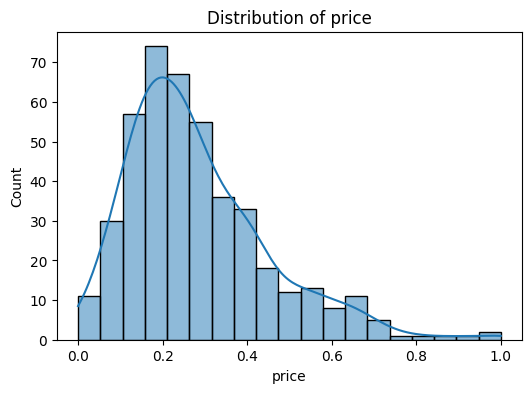

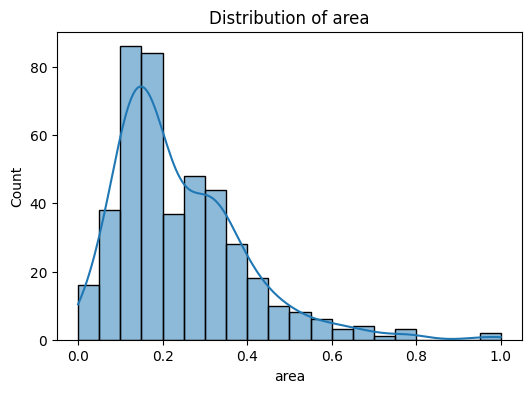

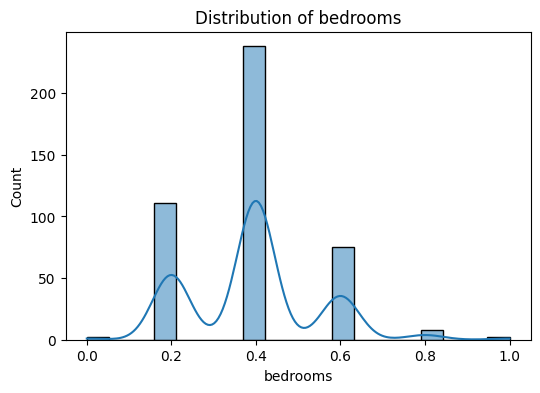

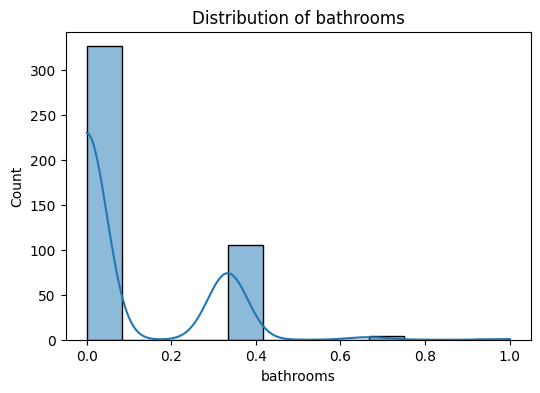

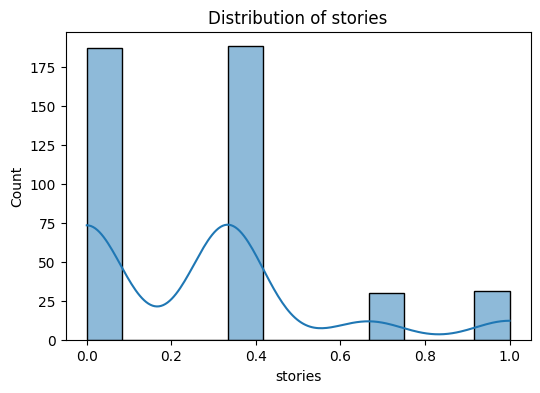

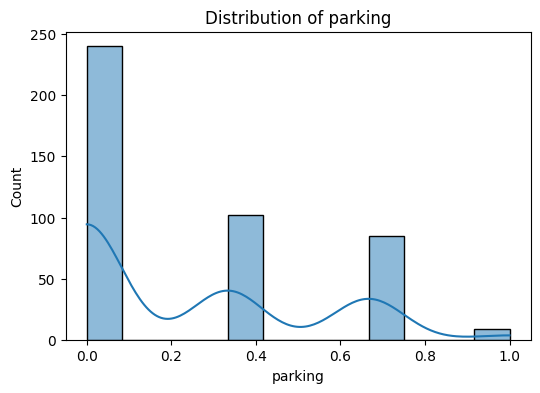

In [27]:
#-------------------------------------------------------------------------------
# 5. Distribution Analysis

# Visualize distribution of continuous features
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Apply log transformation if needed (for highly skewed data)
train_data['price'] = np.log1p(train_data['price'])  # Example: Applying log transformation to 'price'


# Purpose - This snippet focuses on analyzing the distribution of continuous features in the dataset, which helps in understanding the data's characteristics and determining if any transformations are needed.
# Why Use This Model?:
#    - Visualizing the distribution of continuous features helps identify patterns, anomalies, and skewness in the data. This insight is crucial for selecting appropriate statistical methods and transformations to apply.
#    - By applying log transformation to skewed features like 'price', you can improve the model's ability to learn relationships by ensuring that the data adheres more closely to the assumptions of many algorithms, particularly those that assume normally distributed data.

In [28]:
#-------------------------------------------------------------------------------
# 6. Imbalanced Data

# Step 1: Convert price into categories (for binary classification)
# For example, treat prices above a certain threshold as "high" and others as "low"
threshold = train_data['price'].median()  # Using median as a simple threshold for binary classification
train_data['price_category'] = np.where(train_data['price'] > threshold, 1, 0)  # 1: High price, 0: Low price

# Step 2: Check for imbalance in the target variable
print("Class distribution before SMOTE:")
print(train_data['price_category'].value_counts())

# Step 3: Split features and target
X = train_data.drop(['price_category', 'price'], axis=1)  # Features
y = train_data['price_category']  # Target

# Step 4: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Step 5: Check the distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_sm).value_counts())

# Optional: Verify the new dataset shape
print(f"Shape of X before SMOTE: {X.shape}")
print(f"Shape of X after SMOTE: {X_sm.shape}")


# Purpose - This snippet focuses on addressing class imbalance in the dataset, which is crucial for improving the performance of classification models. Imbalanced classes can lead to biased predictions favoring the majority class.
# Functionality - The code first converts the 'price' feature into a binary categorical variable, price_category, where prices above the median are labeled as 1 (High price) and those below as 0 (Low price). This transformation allows for binary classification tasks.
# Why Use This Model?:
#   -Addressing class imbalance is essential because many machine learning algorithms may struggle to learn from imbalanced datasets, leading to poor predictive performance, especially for the minority class.

Class distribution before SMOTE:
price_category
1    218
0    218
Name: count, dtype: int64
Class distribution after SMOTE:
price_category
1    218
0    218
Name: count, dtype: int64
Shape of X before SMOTE: (436, 13)
Shape of X after SMOTE: (436, 13)


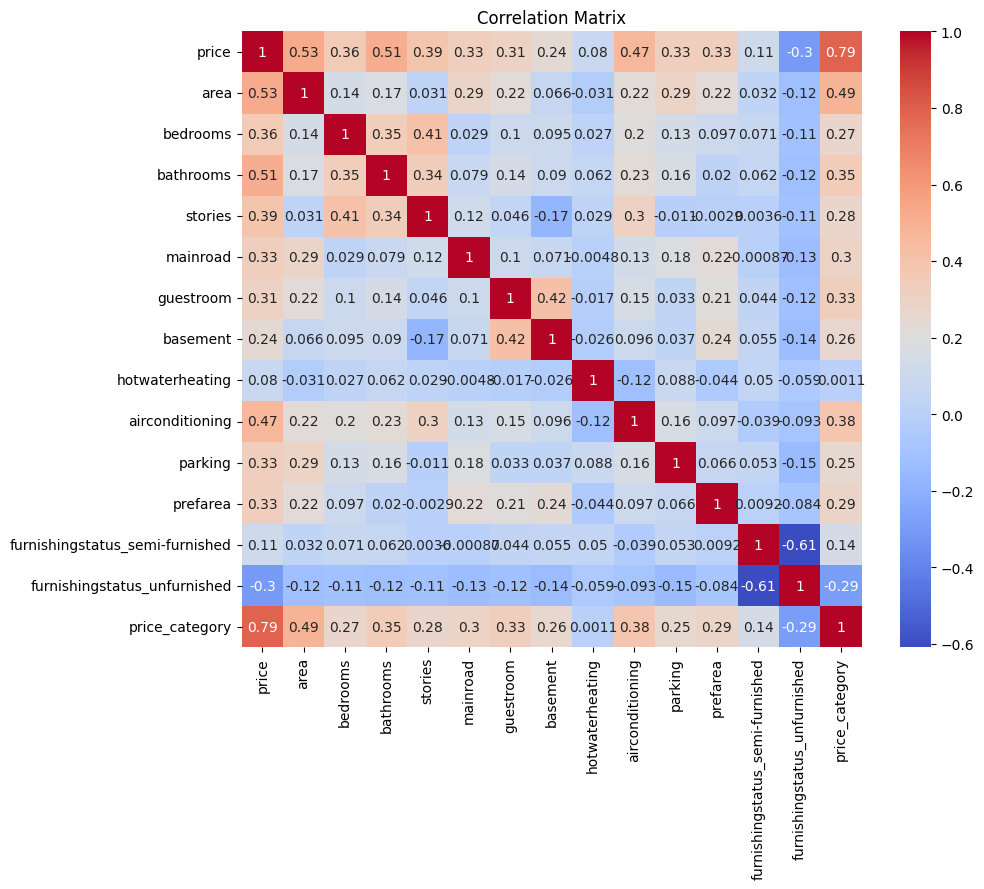

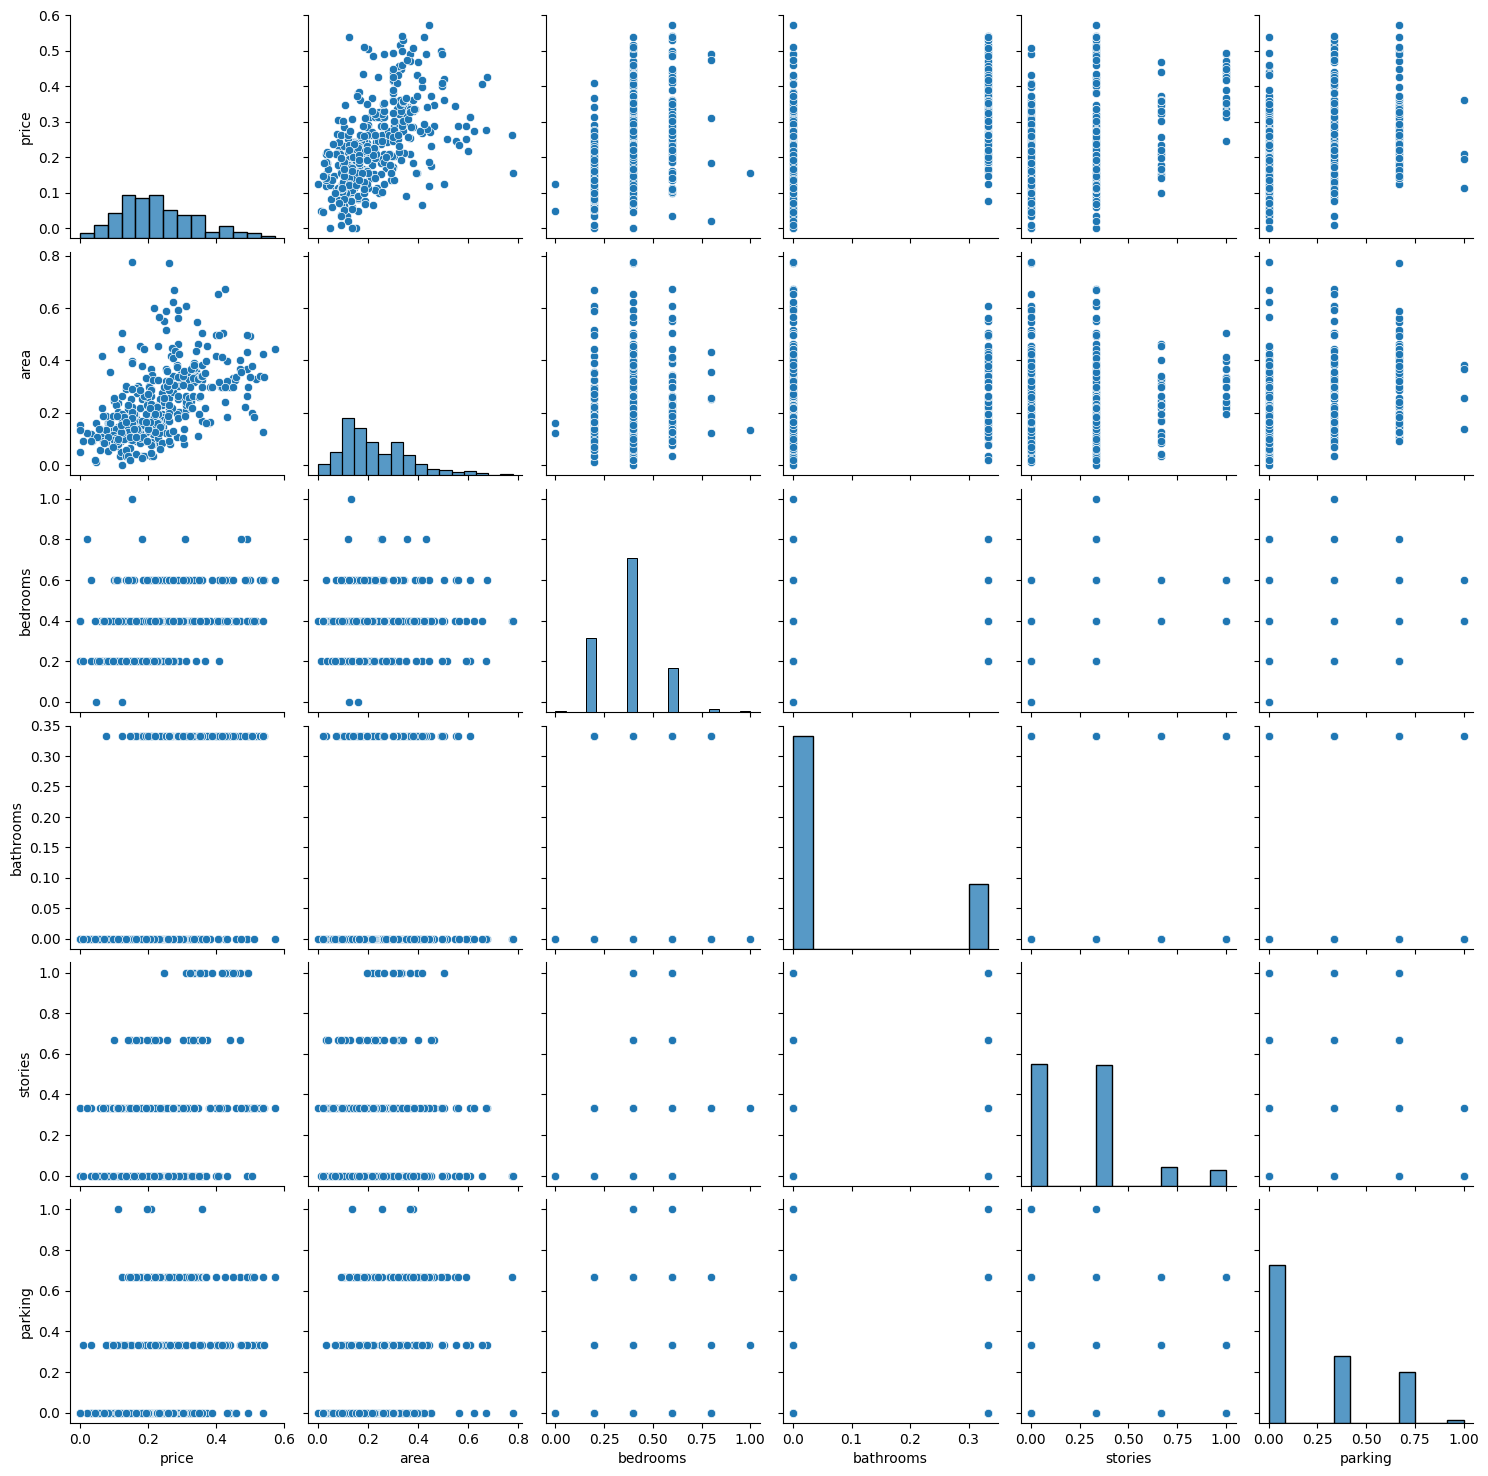

In [11]:
#-------------------------------------------------------------------------------
# 7. Visualization

# Correlation Matrix to show relationships between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot for visualizing relationships between numerical variables
sns.pairplot(train_data[num_cols])
plt.show()

# Save cleaned dataset for model building
train_data.to_csv('cleaned_train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)